# Exercícios 

Você recebeu o arquivo **Supermercado.csv**. Ele contém informações capturadas do Google-maps para pesquisas voltadas à supermercados em Fortaleza. Note que a maioria dos atributos nesse dado são textuais. 


1. O atributo TIPO refere-se a classificação original feita pela usuário em cada instância do dado. Faça um gráfico em barras mostrando a frequências dos valores mais frequêntes nesse dado. Quantos valores distintos há nesse atributo? Quem é o mais frequente? 

2. Considere o elemento mais frequente no atributo TIPO como $TFREQ$ Faça um filtro considerando apenas dados onde a variável TIPO é igual a $TFREQ$ e nomei o dataframe como df_filtrado. 

3. O atributo COMENTARIO refere-se ao número de comentários destacados ao supermercado. Note que, em cada texto, há um número indicando a quantidade de comentários. Capturei-o e crie uma nova coluna em df_filtrado chamada de N_COMENTARIOS. 

4. Faça um scatter-plot entre o número de comentários e a pontuação de cada supermercado. Calcule o valor da correlação entre essas variáveis. 

5. A coluna $LOCAL$ contém o endereço do supermercado. É possível obter em alguns casos o CEP de cada supermercado. Em df_filtrado, calcule quantos CEPS distintos há no conjunto de dados. Faça um gráficos de barras demonstrando a frequência de cada CEP no conjunto de dados. 

DICA: Use try/except quanto necessário. 

In [2]:
import pandas as pd 

In [4]:
df=pd.read_csv('Supermercado.csv',sep=';')

In [5]:
# remova as linhas duplicadas
df=df.drop_duplicates().reset_index(drop=True)

In [6]:
df

,NOME,PONTUACAO,COMENTARIO,LOCAL,TIPO,TEMPO_ESPERA,BUSCA_ID
0,Supermercado Pinheiro - Mondubim,4.2,1.880 comentários,"Av. Godofredo Maciel, 4000 - Mondubim, Fortale...",Supermercado,20 min,Supermercado
1,Supermercado Rabelo,4.1,267 comentários,"Av. Pref. Evandro Ayres de Moura, 250 - Mondub...",Supermercado,15 min,Supermercado
2,Alfredo Supermercado,4.1,916 comentários,"R. Daura, 587 - Barroso, Fortaleza - CE, 60862...",Supermercado,15 min,Supermercado
3,Supermercado Guará (Jacarecanga),4.3,1.786 comentários,"Rua Monsenhor Dantas, 2203 - Jacarecanga, Fort...",Supermercado,20 min,Supermercado
4,Varejão Supermercados,4.2,455 comentários,"Rua Dr. João Amora, 360 - Manuel Sátiro, Forta...",Supermercado,15 min,Supermercado
...,...,...,...,...,...,...,...
254,Supermercado Cotribá - Fortaleza dos Valos,4.3,78 comentários,"Av. Gerônimo Stefanello, 243 - Centro, Fortale...",Supermercado,15 min,Supermercado
255,Mercado Fortaleza,4.3,195 comentários,"R. Rondônia, 5449 - Jardim Tropical, Rolim de ...",Supermercado,15 min,Supermercado
256,Supermercado Fortaleza,4.3,73 comentários,"Av. Fortaleza, 477 - Centro, Seberi - RS, 9838...",Supermercado,15 min,Supermercado
257,Supermercado Fortaleza,NaN,NaN,"Avenida Pedro Ludovico - s/n lt 5, Tabocão - T...",NaN,NaN,Supermercado


In [7]:
df.LOCAL.iloc[0]

'Av. Godofredo Maciel, 4000 - Mondubim, Fortaleza - CE, 60711-502'

In [8]:
df.LOCAL.iloc[1]

'Av. Pref. Evandro Ayres de Moura, 250 - Mondubim, Fortaleza - CE, 60810-670'

In [9]:
df.LOCAL.iloc[20]

'Rua Coronel Alves Teixeira, 422 - Joaquim Távora (Fortaleza), Fortaleza - CE, 60110-533'

In [10]:
df.TIPO.value_counts()

TIPO
Supermercado                                   196
Mercado                                          5
Mercado em Fortaleza, Ceará                      3
Atacadista                                       3
Laboratório médico em Fortaleza, Ceará           2
Shopping center em Fortaleza, Ceará              2
Serviço de distribuição em Fortaleza, Ceará      2
Distribuidora de Bebidas                         1
Fábrica de Móveis                                1
Loja                                             1
Repartição pública em Fortaleza, Ceará           1
Restaurante japonês                              1
Lavanderia em Fortaleza, Ceará                   1
$                                                1
Sindicato em Fortaleza, Ceará                    1
Loja de bebidas alcoólicas                       1
Supermercado asiático                            1
Loja de prateleiras                              1
Shopping center                                  1
Hipermercado              

1. O atributo TIPO refere-se a classificação original feita pela usuário em cada instância do dado. Faça um gráfico em barras mostrando a frequências dos valores mais frequêntes nesse dado. Quantos valores distintos há nesse atributo? Quem é o mais frequente? 


Quantos valores distintos há nesse atributo? 24
Quem é o mais frequente? Supermercado


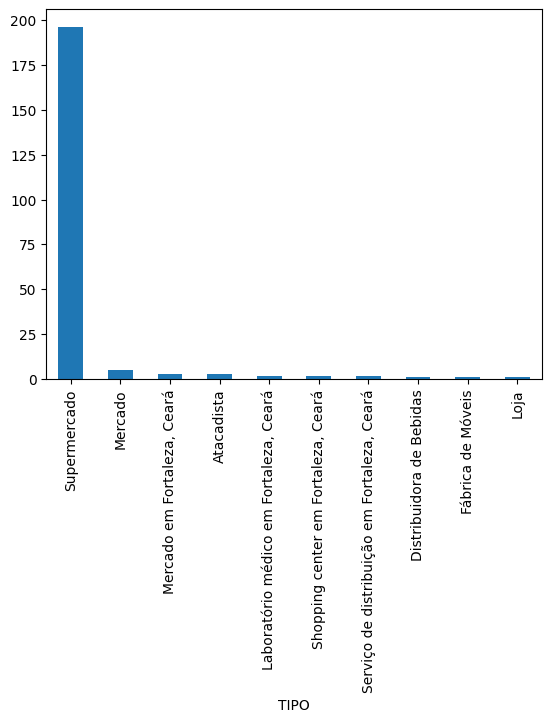

In [17]:
df.TIPO.value_counts().head(10).plot(kind='bar')

tipo_mais_frequente = df.TIPO.value_counts().idxmax()
print('Quantos valores distintos há nesse atributo?', df.TIPO.nunique());
print('Quem é o mais frequente?', tipo_mais_frequente);

2. Considere o elemento mais frequente no atributo TIPO como $TFREQ$ Faça um filtro considerando apenas dados onde a variável TIPO é igual a $TFREQ$ e nomei o dataframe como df_filtrado. 

In [18]:
df_filtrado = df[df.TIPO == tipo_mais_frequente]
df_filtrado.head()

,NOME,PONTUACAO,COMENTARIO,LOCAL,TIPO,TEMPO_ESPERA,BUSCA_ID
0,Supermercado Pinheiro - Mondubim,4.2,1.880 comentários,"Av. Godofredo Maciel, 4000 - Mondubim, Fortale...",Supermercado,20 min,Supermercado
1,Supermercado Rabelo,4.1,267 comentários,"Av. Pref. Evandro Ayres de Moura, 250 - Mondub...",Supermercado,15 min,Supermercado
2,Alfredo Supermercado,4.1,916 comentários,"R. Daura, 587 - Barroso, Fortaleza - CE, 60862...",Supermercado,15 min,Supermercado
3,Supermercado Guará (Jacarecanga),4.3,1.786 comentários,"Rua Monsenhor Dantas, 2203 - Jacarecanga, Fort...",Supermercado,20 min,Supermercado
4,Varejão Supermercados,4.2,455 comentários,"Rua Dr. João Amora, 360 - Manuel Sátiro, Forta...",Supermercado,15 min,Supermercado


3. O atributo COMENTARIO refere-se ao número de comentários destacados ao supermercado. Note que, em cada texto, há um número indicando a quantidade de comentários. Capturei-o e crie uma nova coluna em df_filtrado chamada de N_COMENTARIOS. 

In [ ]:
df_filtrado['N_COMENTARIOS'] = df_filtrado.COMENTARIO.str.lower().str.replace('comentários','').replace('um comentário','1').str.strip().str.replace('.','').astype(int)

df_filtrado.head()

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_94894/3726086933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['N_COMENTARIOS'] = df_filtrado.COMENTARIO.str.lower().str.replace('comentários','').replace('um comentário','1').str.strip().str.replace('.','').astype(int)


,NOME,PONTUACAO,COMENTARIO,LOCAL,TIPO,TEMPO_ESPERA,BUSCA_ID,N_COMENTARIOS
0,Supermercado Pinheiro - Mondubim,4.2,1.880 comentários,"Av. Godofredo Maciel, 4000 - Mondubim, Fortale...",Supermercado,20 min,Supermercado,1880
1,Supermercado Rabelo,4.1,267 comentários,"Av. Pref. Evandro Ayres de Moura, 250 - Mondub...",Supermercado,15 min,Supermercado,267
2,Alfredo Supermercado,4.1,916 comentários,"R. Daura, 587 - Barroso, Fortaleza - CE, 60862...",Supermercado,15 min,Supermercado,916
3,Supermercado Guará (Jacarecanga),4.3,1.786 comentários,"Rua Monsenhor Dantas, 2203 - Jacarecanga, Fort...",Supermercado,20 min,Supermercado,1786
4,Varejão Supermercados,4.2,455 comentários,"Rua Dr. João Amora, 360 - Manuel Sátiro, Forta...",Supermercado,15 min,Supermercado,455


4. Faça um scatter-plot entre o número de comentários e a pontuação de cada supermercado. Calcule o valor da correlação entre essas variáveis. 

<Axes: xlabel='N_COMENTARIOS', ylabel='PONTUACAO'>

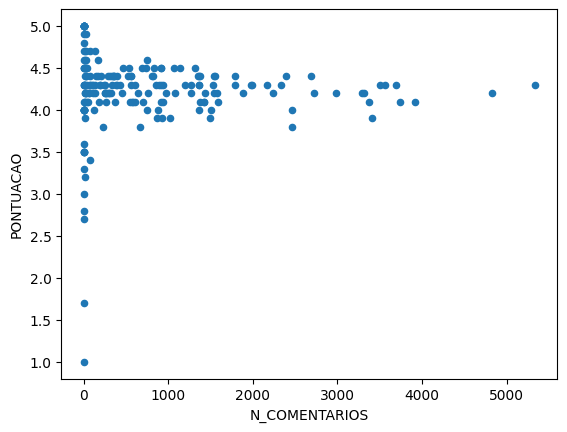

In [ ]:
df_filtrado.plot.scatter(x='N_COMENTARIOS',y='PONTUACAO')

In [32]:
df_filtrado[['N_COMENTARIOS','PONTUACAO']].corr()

,N_COMENTARIOS,PONTUACAO
N_COMENTARIOS,1.000000,-0.004759
PONTUACAO,-0.004759,1.000000


5. A coluna $LOCAL$ contém o endereço do supermercado. É possível obter em alguns casos o CEP de cada supermercado. Em df_filtrado, calcule quantos CEPS distintos há no conjunto de dados. Faça um gráficos de barras demonstrando a frequência de cada CEP no conjunto de dados. 

In [ ]:
df_filtrado['CEP'] = df_filtrado.LOCAL.str.extract(r'(\d{5}-\d{3})')
df_filtrado.head()

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_94894/3365860199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CEP'] = df_filtrado.LOCAL.str.extract(r'(\d{5}-\d{3})')


,NOME,PONTUACAO,COMENTARIO,LOCAL,TIPO,TEMPO_ESPERA,BUSCA_ID,N_COMENTARIOS,CEP
0,Supermercado Pinheiro - Mondubim,4.2,1.880 comentários,"Av. Godofredo Maciel, 4000 - Mondubim, Fortale...",Supermercado,20 min,Supermercado,1880,60711-502
1,Supermercado Rabelo,4.1,267 comentários,"Av. Pref. Evandro Ayres de Moura, 250 - Mondub...",Supermercado,15 min,Supermercado,267,60810-670
2,Alfredo Supermercado,4.1,916 comentários,"R. Daura, 587 - Barroso, Fortaleza - CE, 60862...",Supermercado,15 min,Supermercado,916,60862-760
3,Supermercado Guará (Jacarecanga),4.3,1.786 comentários,"Rua Monsenhor Dantas, 2203 - Jacarecanga, Fort...",Supermercado,20 min,Supermercado,1786,60010-436
4,Varejão Supermercados,4.2,455 comentários,"Rua Dr. João Amora, 360 - Manuel Sátiro, Forta...",Supermercado,15 min,Supermercado,455,60713-300


In [35]:
# calcule quantos CEPS distintos há no conjunto de dados.
print('CEPs distintos:', df_filtrado.CEP.nunique())

CEPs distintos: 175


<Axes: title={'center': 'Frequência dos 10 CEPs mais frequentes'}, xlabel='CEP'>

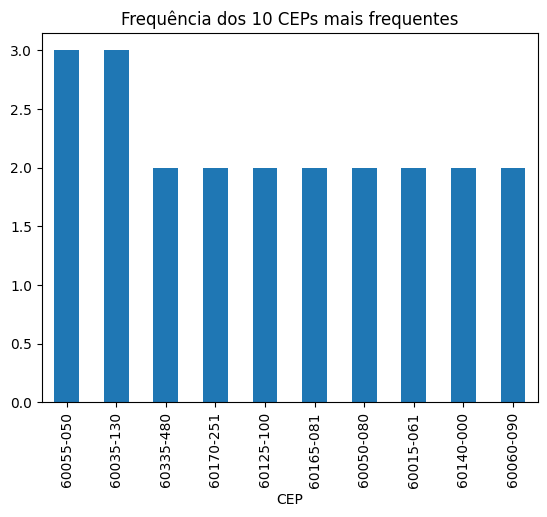

In [ ]:
df_filtrado.CEP.value_counts().head(10).plot(kind='bar', title='Frequência dos 10 CEPs mais frequentes')